# **TASK 1**

Objective: Data Extraction and Cleaning

Task: Import and clean data

Deliverable: Clean dataset ready for analysis.

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Order_Data_meriskill.csv to Order_Data_meriskill (1).csv


# DATA EXTRACTION

In [ ]:
data = pd.read_csv("Order_Data_meriskill.csv")
print(data.shape)
print(data.head())

(55910, 18)
   OrderID          Region         Country CustID    Customer_Name  \
0  SO45080       Northwest   United States  14657      JOHN THOMAS   
1  SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2  SO45082       Australia       Australia  11455        ROSS SANZ   
3  SO45081          Canada          Canada  26782       SETH LEWIS   
4  SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   

   ProductSKU Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
0  BK-R50B-58           Plants              1            1.0     413.1463   
1  BK-R93R-48           Plants              1            1.0    2171.2942   
2  BK-M82B-44           Plants              1            1.0    1898.0944   
3  BK-R50B-44           Plants              1            1.0     413.1463   
4  BK-R93R-48           Plants              1            1.0    2171.2942   

  ProductPrice   OrderDate AcquisitionSource      TransactionID  Fraud  \
0     699.0982  01-01-2020    

<ipython-input-5-bd8740133d32>:1: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Order_Data_meriskill.csv")


In [ ]:
df = pd.DataFrame(data)
print(df)

       OrderID          Region         Country CustID    Customer_Name  \
0      SO45080       Northwest   United States  14657      JOHN THOMAS   
1      SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2      SO45082       Australia       Australia  11455        ROSS SANZ   
3      SO45081          Canada          Canada  26782       SETH LEWIS   
4      SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   
...        ...             ...             ...    ...              ...   
55905  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55906  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55907  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55908  SO74124          France          France  21676      VALERIE GUO   
55909  SO74124          France          France  21676      VALERIE GUO   

       ProductSKU    Product_Category  OrderLineItem  OrderQuantity  \
0      BK-R50B-58              Plants   

# DATA CLEANING

HANDLING MISSING VALUES

In [ ]:
# Check for missing values
print(data.isnull().sum())

OrderID                 0
Region                  0
Country                 0
CustID                  0
Customer_Name           3
ProductSKU              0
Product_Category        0
OrderLineItem           0
OrderQuantity           0
ProductCost             0
ProductPrice            0
OrderDate               0
AcquisitionSource       1
TransactionID           0
Fraud                 703
PaymentMethod           0
CardType             5223
Gender               6328
dtype: int64


In [ ]:
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()

'''# Option 2: Fill missing values with a specific value
data['column_name'] = data['column_name'].fillna(0)

# Option 3: Fill missing values with mean/median/mode
data['column_name'] = data['column_name'].fillna(data['column_name'].mean())'''

"# Option 2: Fill missing values with a specific value\ndata['column_name'] = data['column_name'].fillna(0)\n\n# Option 3: Fill missing values with mean/median/mode\ndata['column_name'] = data['column_name'].fillna(data['column_name'].mean())"

REMOVE DUPLICATES

In [ ]:
# Check for duplicates
print(data.duplicated().sum())

# Drop duplicate rows
data_cleaned = data.drop_duplicates()

0


HANDLE OUTLIERS

The Z-score method for detecting and removing outliers should be applied only to numerical columns in a dataset.

In [ ]:
#identifying numerical columns in our dataset

numerical_columns = [feature for feature in data.columns if data[feature].dtype != 'O']
print("Numerical columns:", numerical_columns)

Numerical columns: ['OrderLineItem', 'OrderQuantity', 'ProductCost']


In [ ]:


from scipy.stats import zscore

z_scores = data[numerical_columns].apply(zscore)

data_cleaned = data[(z_scores.abs() < 3).all(axis=1)]

print("Original Data:")
print(data)
print("\nCleaned Data:")
print(data_cleaned)

Original Data:
       OrderID          Region         Country CustID    Customer_Name  \
0      SO45080       Northwest   United States  14657      JOHN THOMAS   
1      SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2      SO45082       Australia       Australia  11455        ROSS SANZ   
3      SO45081          Canada          Canada  26782       SETH LEWIS   
4      SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   
...        ...             ...             ...    ...              ...   
55905  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55906  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55907  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55908  SO74124          France          France  21676      VALERIE GUO   
55909  SO74124          France          France  21676      VALERIE GUO   

       ProductSKU    Product_Category  OrderLineItem  OrderQuantity  \
0      BK-R50B-58        

Encode Categorical Variable

In [ ]:
#identifying categorical columns

categorical_columns = [col for col in data.columns if data[col].dtype == 'O']

print("Categorical columns:", categorical_columns)

Categorical columns: ['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU', 'Product_Category', 'ProductPrice', 'OrderDate', 'AcquisitionSource', 'TransactionID', 'Fraud', 'PaymentMethod', 'CardType', 'Gender']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical columns have consistent types
categorical_columns = [col for col in data.columns if data[col].dtype == 'O' or data[col].dtype == 'int']
for col in categorical_columns:
    data[col] = data[col].astype(str)  # Convert to strings

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data)

       OrderID  Region  Country  CustID  Customer_Name  ProductSKU  \
0            1       6        5    3505           8845          37   
1            0       8        5   17173          10600          64   
2            3       0        0     439          14640          24   
3            2       1        1   14989          15232          34   
4            4       9        4    3777            353          64   
...        ...     ...      ...     ...            ...         ...   
55905    25103       9        4   16559          16619         130   
55906    25103       9        4   16559          16619           1   
55907    25103       9        4   16559          16619          32   
55908    25085       3        2   10174          16685         104   
55909    25085       3        2   10174          16685         120   

       Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
0                     2              0            1.0     413.1463   
1                  

NORMALIZATION BY MIN_MAX SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Apply MinMaxScaler to all numerical columns
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data)



        OrderID    Region  Country    CustID  Customer_Name  ProductSKU  \
0      0.000040  0.666667      1.0  0.201611       0.510917    0.284615   
1      0.000000  0.888889      1.0  0.987806       0.612292    0.492308   
2      0.000119  0.000000      0.0  0.025252       0.845656    0.184615   
3      0.000080  0.111111      0.2  0.862180       0.879852    0.261538   
4      0.000159  1.000000      0.8  0.217256       0.020390    0.492308   
...         ...       ...      ...       ...            ...         ...   
55905  0.999841  1.000000      0.8  0.952488       0.959970    1.000000   
55906  0.999841  1.000000      0.8  0.952488       0.959970    0.007692   
55907  0.999841  1.000000      0.8  0.952488       0.959970    0.246154   
55908  0.999124  0.333333      0.4  0.585217       0.963782    0.800000   
55909  0.999124  0.333333      0.4  0.585217       0.963782    0.923077   

       Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
0              0.666667      

# **TASK 2**

Objective: Profitability Calculation

Task: Calculate per-user profitability for each campaign.

Deliverable: Profitability metrics for all campaigns.

Calculate Per-User Profitability

In [ ]:
# Add a per-user profit column
data['profit'] = data['ProductPrice'] - data['ProductCost']

# Display the updated DataFrame or profit column
print(data['profit'])

0        0.670508
1       -0.348837
2       -0.339243
3        0.670508
4       -0.348837
           ...   
55905    0.673953
55906    0.975590
55907    0.586249
55908    0.186047
55909    0.252505
Name: profit, Length: 55910, dtype: float64


Aggregate Total Profit and User Numbers per Campaign

In [ ]:
# Group by 'OrderID' to calculate total profit and user count
total_profit = data.groupby('OrderID')['profit'].sum()
user_count = data.groupby('OrderID')['CustID'].count()

# Combine into a single DataFrame
campaign_metrics = pd.DataFrame({
    'total_profit': total_profit,
    'user_count': user_count
}).reset_index()

# Add profitability per user
campaign_metrics['profitability_per_user'] = campaign_metrics['total_profit'] / campaign_metrics['user_count']

print(campaign_metrics)

        OrderID  total_profit  user_count  profitability_per_user
0      0.000000     -0.348837           1               -0.348837
1      0.000040      0.670508           1                0.670508
2      0.000080      0.670508           1                0.670508
3      0.000119     -0.339243           1               -0.339243
4      0.000159     -0.348837           1               -0.348837
...         ...           ...         ...                     ...
25103  0.999841      2.557292           4                0.639323
25104  0.999881      0.172930           2                0.086465
25105  0.999920     -0.333551           1               -0.333551
25106  0.999960      0.586249           1                0.586249
25107  1.000000      1.540925           3                0.513642

[25108 rows x 4 columns]


Calculate Campaign Profitability

Divide total profit by the number of users acquired to calculate profitability.

In [ ]:
# Add a profitability column
campaign_metrics['profitability_per_user'] = campaign_metrics['total_profit'] / campaign_metrics['user_count']

# Display the final metrics
print(campaign_metrics)

        OrderID  total_profit  user_count  profitability_per_user
0      0.000000     -0.348837           1               -0.348837
1      0.000040      0.670508           1                0.670508
2      0.000080      0.670508           1                0.670508
3      0.000119     -0.339243           1               -0.339243
4      0.000159     -0.348837           1               -0.348837
...         ...           ...         ...                     ...
25103  0.999841      2.557292           4                0.639323
25104  0.999881      0.172930           2                0.086465
25105  0.999920     -0.333551           1               -0.333551
25106  0.999960      0.586249           1                0.586249
25107  1.000000      1.540925           3                0.513642

[25108 rows x 4 columns]


Identify Trends, Outliers, and Patterns

Perform an initial analysis by summarizing and visualizing the data.

In [ ]:
# Summary statistics
print(campaign_metrics.describe())

            OrderID  total_profit    user_count  profitability_per_user
count  25108.000000  25108.000000  25108.000000            25108.000000
mean       0.500000      0.953068      2.226780                0.354422
std        0.288692      0.908323      1.136109                0.366079
min        0.000000     -0.348837      1.000000               -0.348837
25%        0.250000      0.293676      1.000000                0.166691
50%        0.500000      0.860000      2.000000                0.446292
75%        0.750000      1.548616      3.000000                0.625633
max        1.000000      4.789229      8.000000                0.998673


**Detect Outliers:**

Using box plots or identifying campaigns with profitability much higher or lower than the average.

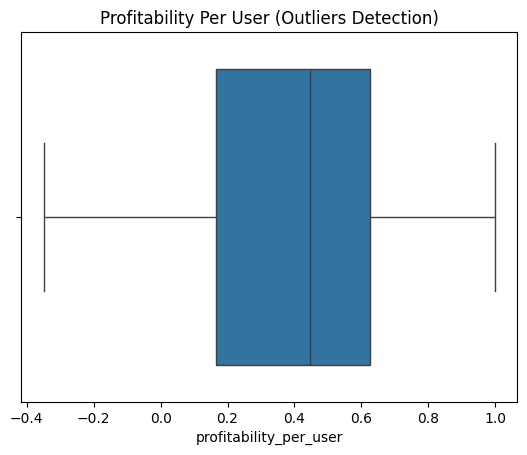

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to detect profitability outliers
sns.boxplot(data=campaign_metrics, x='profitability_per_user')
plt.title('Profitability Per User (Outliers Detection)')
plt.show()

In [ ]:
# Export results to a CSV file
campaign_metrics.to_csv('campaign_profitability.csv', index=False)
print("Results saved to 'campaign_profitability.csv'.")


Results saved to 'campaign_profitability.csv'.


# TASK 3

Objective: Campaign Comparison

Task: Compare profitability metrics and identify the best campaign.

Deliverable: Identification of the most profitable campaign.

Compute total profit, user count, cost per acquisition (CPA), and profitability per user for each campaign.

In [ ]:
total_cost = data.groupby('OrderID')['ProductCost'].sum()

campaign_metrics = pd.DataFrame({
    'total_profit': total_profit,
    'user_count': user_count,
    'total_cost': total_cost
}).reset_index()

campaign_metrics['profitability_per_user'] = campaign_metrics['total_profit'] / campaign_metrics['user_count']
campaign_metrics['cost_per_acquisition'] = campaign_metrics['total_cost'] / campaign_metrics['user_count']

# Display campaign metrics
print(campaign_metrics)

        OrderID  total_profit  user_count  total_cost  profitability_per_user  \
0      0.000000     -0.348837           1    1.000000               -0.348837   
1      0.000040      0.670508           1    0.189957                0.670508   
2      0.000080      0.670508           1    0.189957                0.670508   
3      0.000119     -0.339243           1    0.874127               -0.339243   
4      0.000159     -0.348837           1    1.000000               -0.348837   
...         ...           ...         ...         ...                     ...   
25103  0.999841      2.557292           4    0.163638                0.639323   
25104  0.999881      0.172930           2    0.687535                0.086465   
25105  0.999920     -0.333551           1    0.682388               -0.333551   
25106  0.999960      0.586249           1    0.157937                0.586249   
25107  1.000000      1.540925           3    0.180005                0.513642   

       cost_per_acquisition

Compare Campaigns

Find the most effective campaign based on the highest profitability per user and the lowest cost per acquisition.

In [ ]:
# Sort campaigns by profitability per user
sorted_by_profitability = campaign_metrics.sort_values(by='profitability_per_user', ascending=False)

# Find the top-performing campaigns
most_profitable_campaign = sorted_by_profitability.iloc[0]
print("Most Profitable Campaign:")
print(most_profitable_campaign)

# Sort campaigns by cost per acquisition
sorted_by_cpa = campaign_metrics.sort_values(by='cost_per_acquisition', ascending=True)

# Find the campaign with the lowest CPA
lowest_cpa_campaign = sorted_by_cpa.iloc[0]
print("Campaign with Lowest Cost per Acquisition:")
print(lowest_cpa_campaign)
print('the strongest market campaign among all is ')

Most Profitable Campaign:
OrderID                   0.457084
total_profit              0.998673
user_count                1.000000
total_cost                0.001327
profitability_per_user    0.998673
cost_per_acquisition      0.001327
Name: 11476, dtype: float64
Campaign with Lowest Cost per Acquisition:
OrderID                   0.729796
total_profit              0.186047
user_count                1.000000
total_cost                0.000000
profitability_per_user    0.186047
cost_per_acquisition      0.000000
Name: 18323, dtype: float64
the strongest market campaign among all is 


# Visualize Profitability

Create bar charts and pie charts to illustrate campaign performance.

Bar Chart: Profitability Per User

<ipython-input-23-22ff619a990e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campaign_metrics, x='OrderID', y='profitability_per_user', palette='coolwarm')


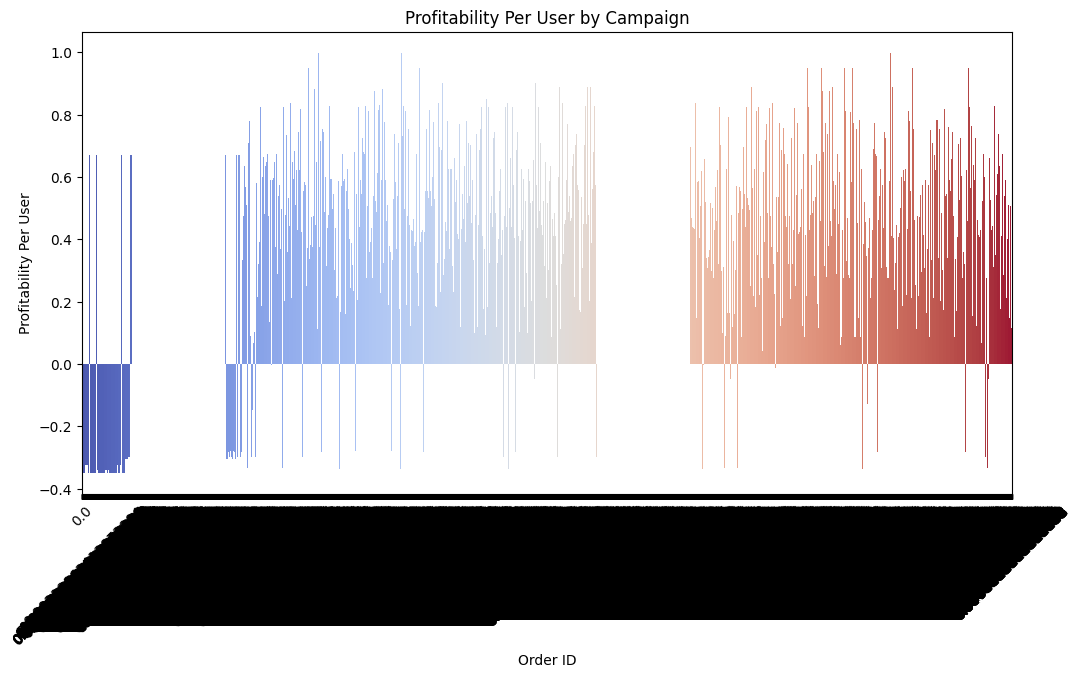

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_metrics, x='OrderID', y='profitability_per_user', palette='coolwarm')
plt.title('Profitability Per User by Campaign')
plt.xlabel('Order ID')
plt.ylabel('Profitability Per User')
plt.xticks(rotation=45)
plt.show()

Pie Chart: Distribution of Total Profit

ValueError: Wedge sizes 'x' must be non negative values

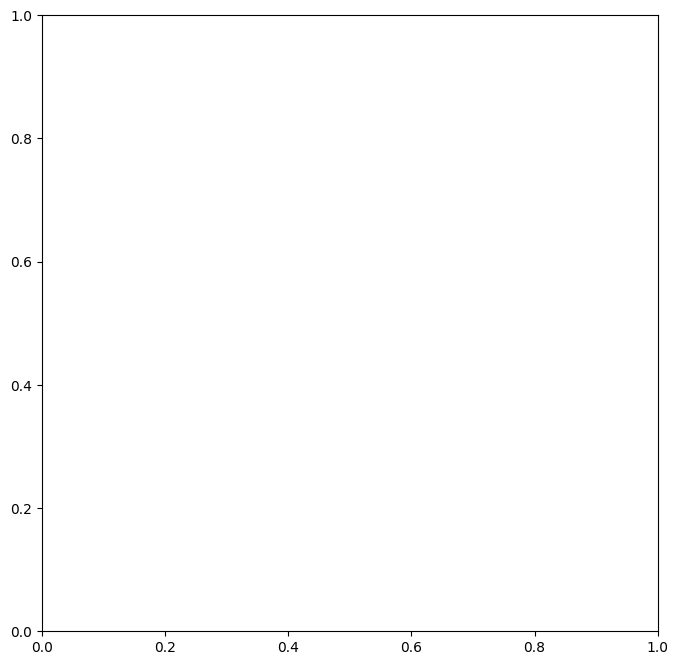

In [ ]:
# Pie chart for total profit distribution
plt.figure(figsize=(8, 8))
plt.pie(campaign_metrics['total_profit'], labels=campaign_metrics['OrderID'], autopct='%1.1f%%', startangle=140)
plt.title('Total Profit Distribution by Campaign')
plt.show()


The error occurs because the total_profit column contains negative values. Pie charts require all values to be non-negative, as they represent proportions of a whole. To fix this, you can do one of the following:

# Remove Negative Values

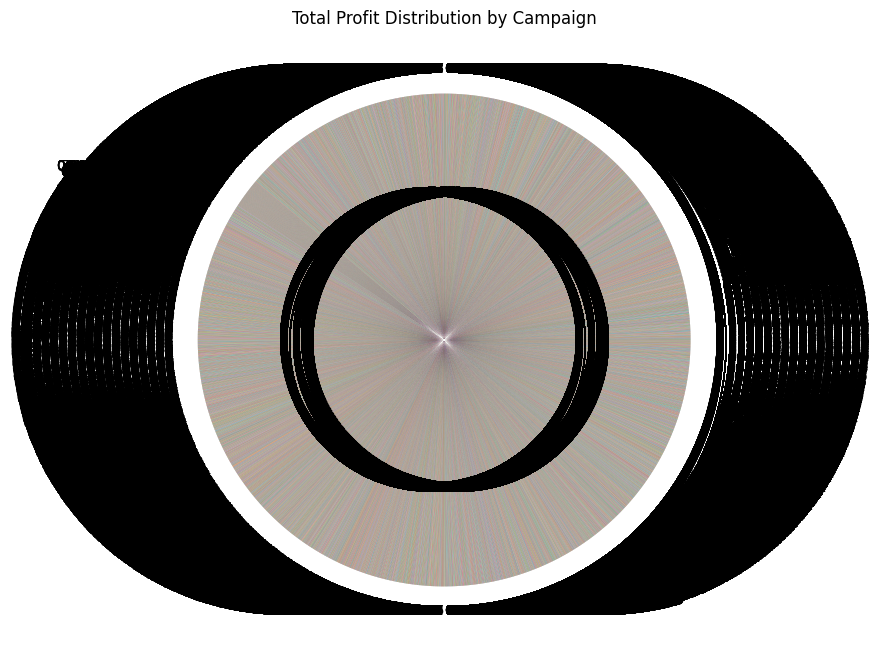

In [ ]:
# Filter out campaigns with negative total profit
positive_profit_metrics = campaign_metrics[campaign_metrics['total_profit'] > 0]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(positive_profit_metrics['total_profit'],
        labels=positive_profit_metrics['OrderID'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Total Profit Distribution by Campaign')
plt.show()

# Convert Negative Values to Zero

In [ ]:
# Replace negative total profits with zero
'''campaign_metrics['total_profit'] = campaign_metrics['total_profit'].clip(lower=0)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(campaign_metrics['total_profit'],
        labels=campaign_metrics['OrderID'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Total Profit Distribution by Campaign')
plt.show()'''


# TASK 4

Objective: Conversion Rate and CAC Analysis

Task:Calculate conversion rates and CAC for each acquisition source.

Deliverable: Metrics for conversion rates and CAC.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data['ProductPrice'] = pd.to_numeric(data['ProductPrice'], errors='coerce')
data['ProductCost'] = pd.to_numeric(data['ProductCost'], errors='coerce')

# Calculate Revenue and Profit (Revenue = ProductPrice * OrderQuantity)
data['Revenue'] = data['ProductPrice'] * data['OrderQuantity']
data['Profit'] = data['Revenue'] - (data['ProductCost'] * data['OrderQuantity'])

# Data Segmentation

Group by AcquisitionSource:

In [ ]:
# Aggregate metrics by AcquisitionSource
metrics = data.groupby('AcquisitionSource').agg(
    total_orders=('OrderID', 'nunique'),  # Unique orders
    total_customers=('CustID', 'nunique'),  # Unique customers
    total_revenue=('Revenue', 'sum'),  # Total revenue
    total_cost=('ProductCost', 'sum')  # Total product cost
).reset_index()

# Add calculated metrics
metrics['conversion_rate'] = (metrics['total_orders'] / metrics['total_customers']) * 100  # Conversion Rate
metrics['cac'] = metrics['total_cost'] / metrics['total_customers']  # Customer Acquisition Cost

# Profitability Analysis

In [ ]:
# Calculate profit margin
metrics['profit_margin'] = (metrics['total_revenue'] - metrics['total_cost']) / metrics['total_revenue'] * 100

# Rank by profitability score
metrics['efficiency_score'] = metrics['conversion_rate'] / metrics['cac']
metrics = metrics.sort_values(by='efficiency_score', ascending=False)


# Visualization

# 1. Bar Chart: Conversion Rates

<ipython-input-40-dd1a1cc08af4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='conversion_rate', data=metrics, palette='viridis')


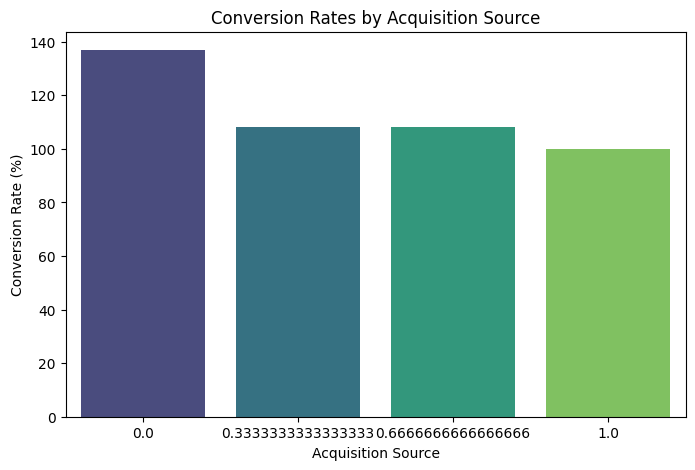

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='AcquisitionSource', y='conversion_rate', data=metrics, palette='viridis')
plt.title('Conversion Rates by Acquisition Source')
plt.xlabel('Acquisition Source')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Bar Chart: CAC

<ipython-input-41-8faf14c2397f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='cac', data=metrics, palette='coolwarm')


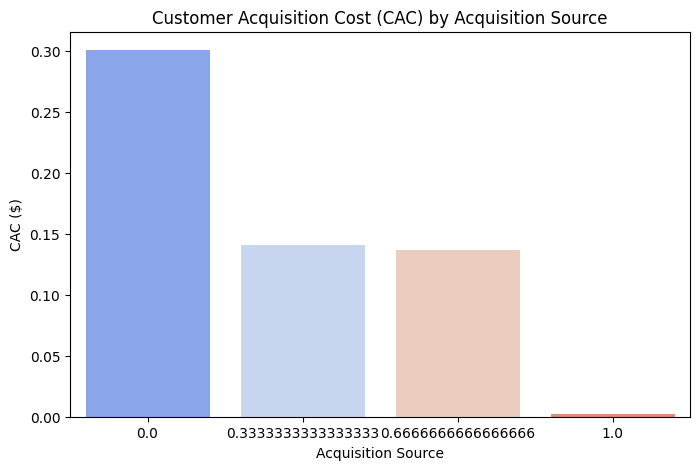

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='AcquisitionSource', y='cac', data=metrics, palette='coolwarm')
plt.title('Customer Acquisition Cost (CAC) by Acquisition Source')
plt.xlabel('Acquisition Source')
plt.ylabel('CAC ($)')
plt.show()


# Scatter Plot: Conversion Rate vs. CAC

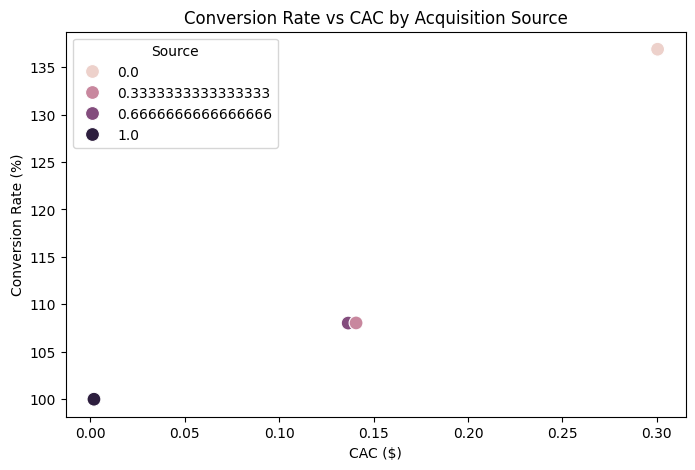

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cac', y='conversion_rate', hue='AcquisitionSource', data=metrics, s=100)
plt.title('Conversion Rate vs CAC by Acquisition Source')
plt.xlabel('CAC ($)')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Source')
plt.show()


In [ ]:
print(metrics)

   AcquisitionSource  total_orders  total_customers  total_revenue  \
3           1.000000             1                1       0.060440   
2           0.666667          4912             4547     793.476744   
1           0.333333          4851             4490     789.151163   
0           0.000000         22460            16407    6166.220930   

    total_cost  conversion_rate       cac  profit_margin  efficiency_score  
3     0.001904       100.000000  0.001904      96.848992      52508.472239  
2   620.844386       108.027271  0.136539      21.756448        791.180545  
1   631.815546       108.040089  0.140716      19.937323        767.787375  
0  4928.872892       136.892790  0.300413      20.066554        455.682272  


# TASK 5

Objective: Prediction and Visualization

Task: Predict customer acquisition based on budget and create
visualizations.

Deliverable: Forecast report and visualizations, including
recommendations for budget allocation.

In [ ]:
# Define the budget
budget = 10000  # Example budget in dollars

# Estimate customers that can be acquired
metrics['estimated_customers'] = budget / metrics['cac']

print(metrics)

   AcquisitionSource  total_orders  total_customers  total_revenue  \
3           1.000000             1                1       0.060440   
2           0.666667          4912             4547     793.476744   
1           0.333333          4851             4490     789.151163   
0           0.000000         22460            16407    6166.220930   

    total_cost  conversion_rate       cac  profit_margin  efficiency_score  \
3     0.001904       100.000000  0.001904      96.848992      52508.472239   
2   620.844386       108.027271  0.136539      21.756448        791.180545   
1   631.815546       108.040089  0.140716      19.937323        767.787375   
0  4928.872892       136.892790  0.300413      20.066554        455.682272   

   estimated_customers  
3         5.250847e+06  
2         7.323896e+04  
1         7.106504e+04  
0         3.328753e+04  


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


historical_data = {
    'budget': [5000, 10000, 15000, 20000],  # Historical budgets
}

# Convert to DataFrame
history_df = pd.DataFrame(historical_data)

# Define features (X) and target (y)
X = history_df[['budget']]  # Budget as feature
y = metrics['estimated_customers'] # Customers acquired as target

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict customers for the new budget
future_budget = np.array([[12000]])  # New budget
predicted_customers = model.predict(future_budget)

print(f"Predicted customers for a budget of $12,000: {int(predicted_customers[0])}")



Predicted customers for a budget of $12,000: 1513658


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Visualization

Bar Chart: Estimated Customers

<ipython-input-62-4153206bd96f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics['AcquisitionSource'] , y=metrics['estimated_customers'], palette='viridis')


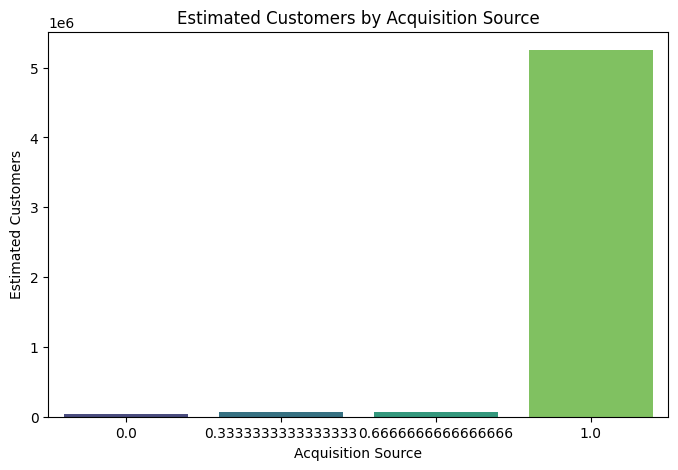

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics['AcquisitionSource'] , y=metrics['estimated_customers'], palette='viridis')
plt.title('Estimated Customers by Acquisition Source')
plt.xlabel('Acquisition Source')
plt.ylabel('Estimated Customers')
plt.show()


# Regression Line: Historical Budget vs. Customers


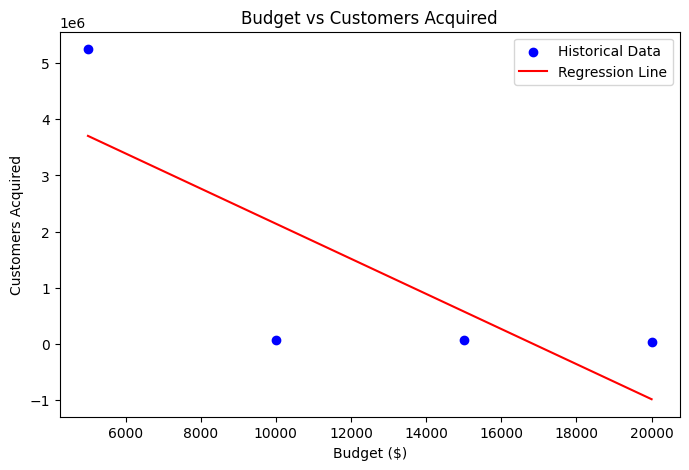

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.scatter(history_df['budget'], metrics['estimated_customers'], color='blue', label='Historical Data')
plt.plot(history_df['budget'], model.predict(X), color='red', label='Regression Line')
plt.title('Budget vs Customers Acquired')
plt.xlabel('Budget ($)')
plt.ylabel('Customers Acquired')
plt.legend()
plt.show()